# Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
import statsmodels.api as sm
import pylab as pl

# Read the data as a data frame using pandas

In [2]:
data = pd.read_csv('bank-full.csv')

# Shape of the data

In [3]:
data.shape

(45211, 17)

# Data type of each attribute

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


The dataframe has 10 columns with datatype as object and 7 cloumns as integer. 

# Checking the presence of missing values

In [5]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


Following columns have unknown values - job, education, contact and poutcome. There are no NaN values in the dataframe.
balance, pdays columns shows negative values.

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# Checking for class imbalance

In [7]:
data['Target'].unique()

array(['no', 'yes'], dtype=object)

In [8]:
data.Target.replace(to_replace='yes', value = 1, inplace = True)
data.Target.replace(to_replace='no', value = 0, inplace = True)
data.Target.skew()

2.383480446979124

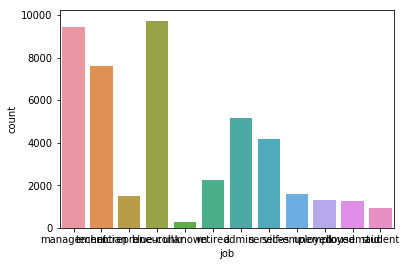

In [9]:
sns.countplot(data['job'])

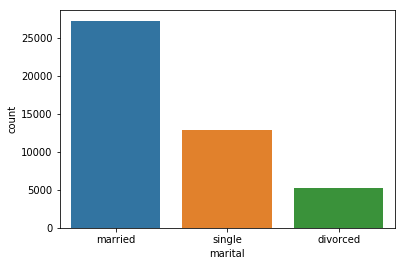

In [10]:
sns.countplot(data['marital'])

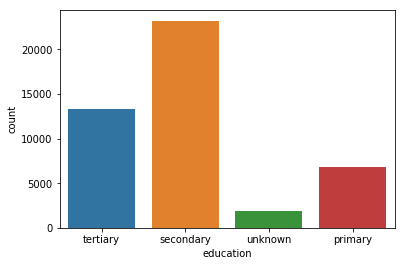

In [11]:
sns.countplot(data['education'])

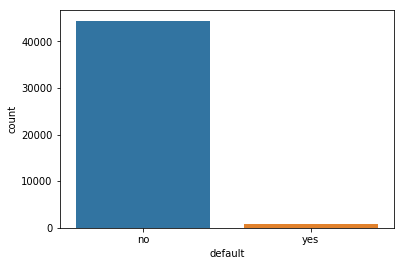

In [12]:
sns.countplot(data['default'])

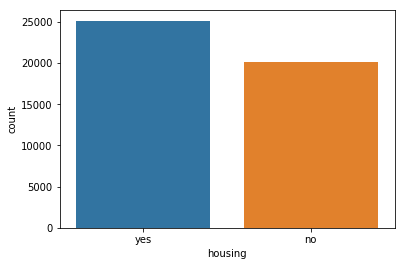

In [13]:
sns.countplot(data['housing'])

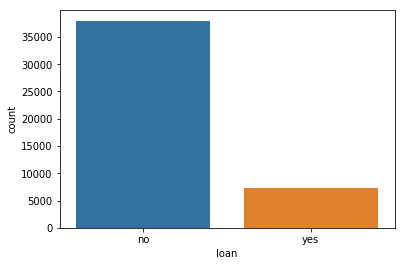

In [14]:
sns.countplot(data['loan'])

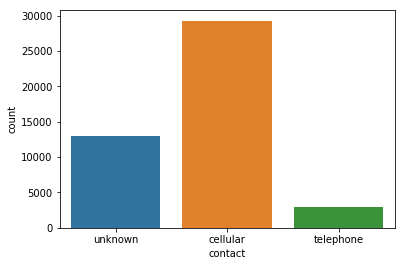

In [15]:
sns.countplot(data['contact'])

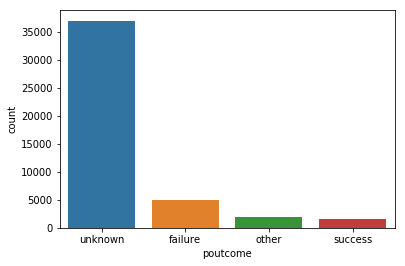

In [16]:
sns.countplot(data['poutcome'])

The outcome of the previous campaigns is not konow for majority of the customers.

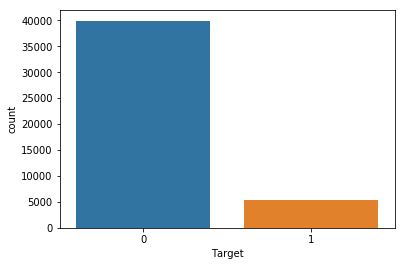

In [17]:
sns.countplot(data['Target'])

There is a class imbalance in the number of customers who took a term desposit. 

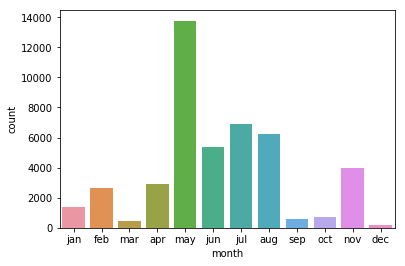

In [18]:
sns.countplot(data['month'], order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])

High number of last contacts were done in month of May. It will be interesting to see the relationship of month to he previous contact outcome. It may be skewed since for majority of the customers outcome is not known.

# Checking the presence of outliers

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null int64
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


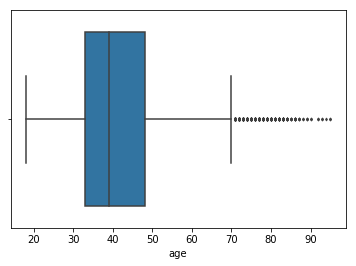

In [20]:
sns.boxplot(data['age'], fliersize=2)

The customers min age is 18 and max age is 95 with the medain being just below 40 year. There are customers above 70 years of age who may not be interested in the campaign and it will be interesting to see if the age influences the number of campaigns or viceversa, the subcriotion to term deposit, the out come of previous campaigns.

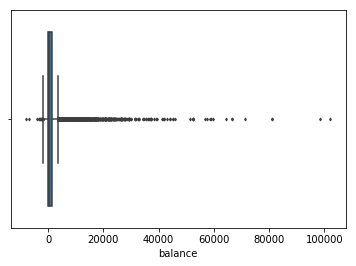

In [21]:
sns.boxplot(data['balance'], fliersize=2)

Most of the bank customers have very low average monthly balance. Some customers have a negative balance. These values should be verified for appropriateness. If found appropriate it may be worthwhile to check their inclusion in previous campaigns and their response. 

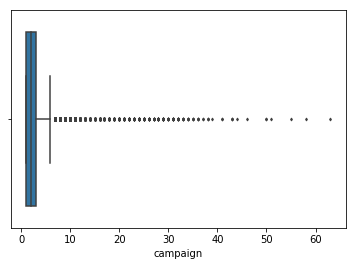

In [22]:
sns.boxplot(data['campaign'], fliersize=2)

On an average 2 contacts were maded with a customer during last campaign. Few customers were contacted more frequently and this data should be looked into with the term deposits data. 

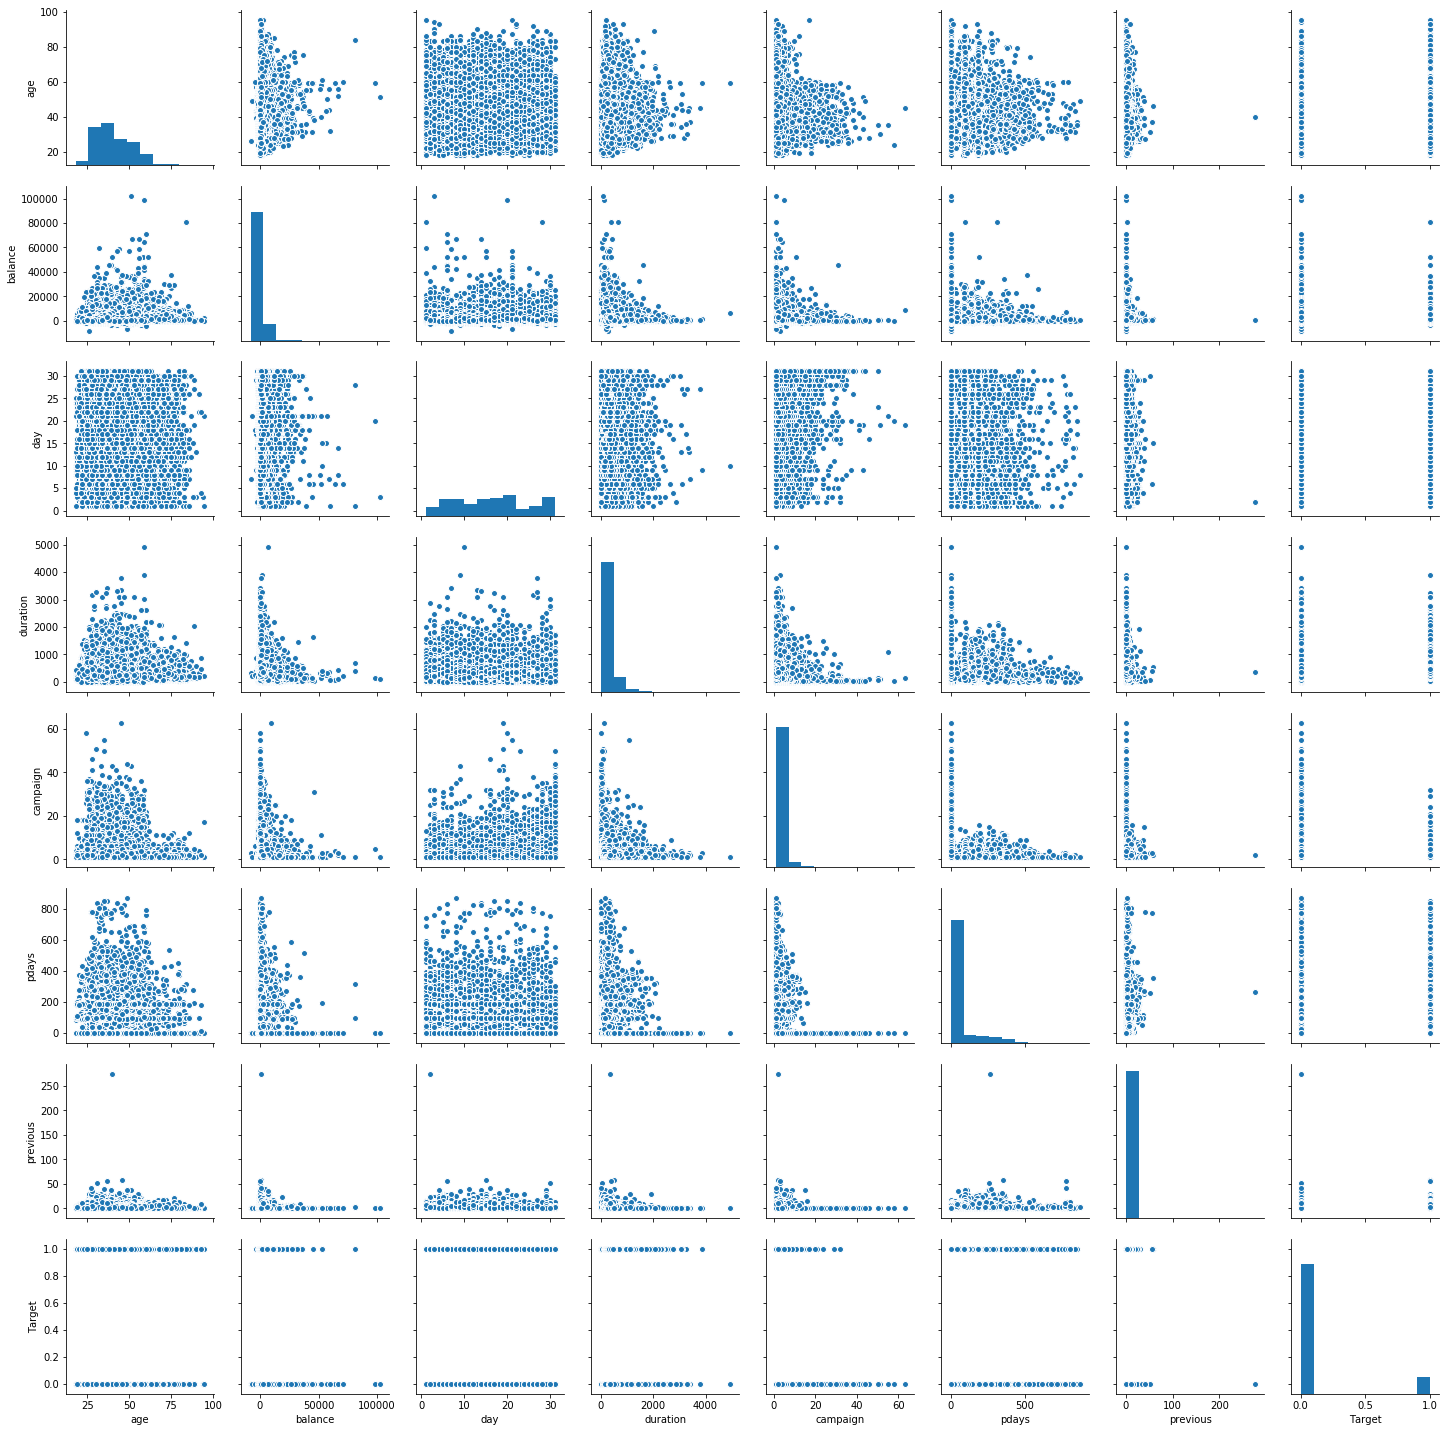

In [23]:
sns.pairplot(data)

# Check for appropriate data types and make changes if required

# Converting object data type to category

In [24]:
data.drop(data.columns [[9,10,11]],axis = 1, inplace = True)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,0,unknown,0


In [25]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,unknown,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,1,-1,0,unknown,0
8,58,retired,married,primary,no,121,yes,no,unknown,1,-1,0,unknown,0
9,43,technician,single,secondary,no,593,yes,no,unknown,1,-1,0,unknown,0


In [26]:
print(data.job.value_counts())
print(data.marital.value_counts())
print(data.education.value_counts())
print(data.default.value_counts())
print(data.housing.value_counts())
print(data.loan.value_counts())
print(data.contact.value_counts())
print(data.poutcome.value_counts())
print(data.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
0    39922
1     5289
Name: Target, dtype: int64


# Take appropriate actions for missing values

There are no missing values(NaN)in the dataset. Some of the information is labled as unknown. It has not be treated as missing information as it would lead to formation on a descision or clusters.

In [27]:
replaceStruct = { 
    #"job": {"blue-collar": 1, "management": 2 ,"technician": 3 ,"admin.": 4,"services": 5,},"retired": 6,"self-employed": 7,
            #"entrepreneur": 8, "unemployed": 9,"housemaid": 10,"student": 11,"unknown": -1,
    "marital": {"married": 1, "single": 2 , "divorced": 3},
    "education": {"secondary": 1, "tertiary":2 , "primary": 3, "unknown": -1},
    "default": {"yes": 1, "no": 0},
    "housing": {"yes": 1, "no": 0},
    "loan": {"yes": 1, "no": 0},
    "contact": {"cellular": 1, "telephone": 2,"unknown": -1},
    "poutcome":{"unknown": -1, "failure": 1, "other": 3, "success": 2}
                }
oneHotCols=["job"]

In [28]:
data = data.replace(replaceStruct)
data=pd.get_dummies(data, columns=oneHotCols)

In [29]:
data.head()

,age,marital,education,default,balance,housing,loan,contact,campaign,pdays,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,1,2,0,2143,1,0,-1,1,-1,...,0,0,1,0,0,0,0,0,0,0
1,44,2,1,0,29,1,0,-1,1,-1,...,0,0,0,0,0,0,0,1,0,0
2,33,1,1,0,2,1,1,-1,1,-1,...,1,0,0,0,0,0,0,0,0,0
3,47,1,-1,0,1506,1,0,-1,1,-1,...,0,0,0,0,0,0,0,0,0,0
4,33,2,-1,0,1,0,0,-1,1,-1,...,0,0,0,0,0,0,0,0,0,1


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 25 columns):
age                  45211 non-null int64
marital              45211 non-null int64
education            45211 non-null int64
default              45211 non-null int64
balance              45211 non-null int64
housing              45211 non-null int64
loan                 45211 non-null int64
contact              45211 non-null int64
campaign             45211 non-null int64
pdays                45211 non-null int64
previous             45211 non-null int64
poutcome             45211 non-null int64
Target               45211 non-null int64
job_admin.           45211 non-null uint8
job_blue-collar      45211 non-null uint8
job_entrepreneur     45211 non-null uint8
job_housemaid        45211 non-null uint8
job_management       45211 non-null uint8
job_retired          45211 non-null uint8
job_self-employed    45211 non-null uint8
job_services         45211 non-null uint8
job_stude

# Take appropriate actions for outliers

The further processing of data may not impact the emsemble techiques. It is more important to scale the data.

# Do data scaling/Normalization if required

In [31]:
data.describe()

,age,marital,education,default,balance,housing,loan,contact,campaign,pdays,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1.513238,1.515118,0.018027,1362.272058,0.555838,0.160226,0.488310,2.763841,40.197828,...,0.032890,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,0.168034,0.028820,0.006370
std,10.618762,0.692948,0.894037,0.133049,3044.765829,0.496878,0.366820,0.976936,3.098021,100.128746,...,0.178351,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,0.373901,0.167303,0.079559
min,18.000000,1.000000,-1.000000,0.000000,-8019.000000,0.000000,0.000000,-1.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,-1.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,1.000000,2.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,1.000000,3.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,95.000000,3.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,63.000000,871.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


# Split data into train/test

In [32]:
X = data.drop("Target", axis=1)

In [33]:
X.head()

,age,marital,education,default,balance,housing,loan,contact,campaign,pdays,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,1,2,0,2143,1,0,-1,1,-1,...,0,0,1,0,0,0,0,0,0,0
1,44,2,1,0,29,1,0,-1,1,-1,...,0,0,0,0,0,0,0,1,0,0
2,33,1,1,0,2,1,1,-1,1,-1,...,1,0,0,0,0,0,0,0,0,0
3,47,1,-1,0,1506,1,0,-1,1,-1,...,0,0,0,0,0,0,0,0,0,0
4,33,2,-1,0,1,0,0,-1,1,-1,...,0,0,0,0,0,0,0,0,0,1


In [34]:
y = data.pop("Target")

In [35]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

# Apply multiple models by fitting train data

# Building a Decision Tree Model (Gini)

In [37]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

# Scoring our Decision Tree

In [38]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9995576199955762
0.8232084930698909


The training set seem to be overfitting as indicated by 0.99 dTree score. The test set show a relatively lesser score indicating that the model may not give adeqaute accuracy in real world data. By adjusting the max depth of the tree to 3 nodes only, let us check the impact on the train and test scores.

In [39]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8917116946314027
0.895532291359481


In [40]:
'''importance of features in the tree building ( The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )'''

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                        Imp
age                0.115950
marital            0.005022
education          0.000000
default            0.000000
balance            0.000000
housing            0.052624
loan               0.000000
contact            0.076696
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.749708
job_admin.         0.000000
job_blue-collar    0.000000
job_entrepreneur   0.000000
job_housemaid      0.000000
job_management     0.000000
job_retired        0.000000
job_self-employed  0.000000
job_services       0.000000
job_student        0.000000
job_technician     0.000000
job_unemployed     0.000000
job_unknown        0.000000


0.895532291359481


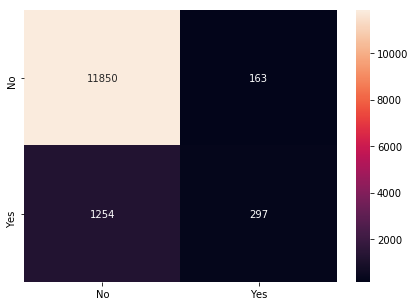

In [41]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - Bagging

In [42]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.8861692716012975


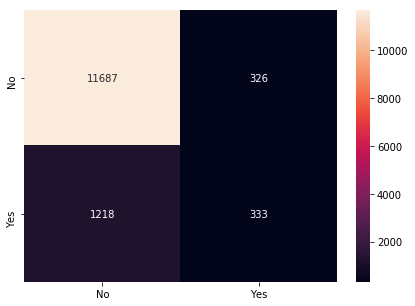

In [43]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - AdaBoosting

In [44]:
 from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.8949424948392805


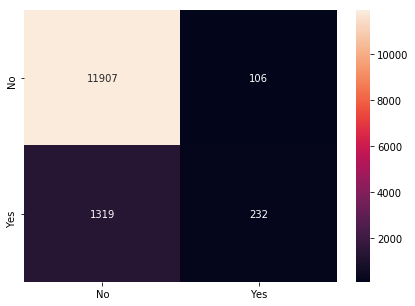

In [45]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - GradientBoost

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.895532291359481


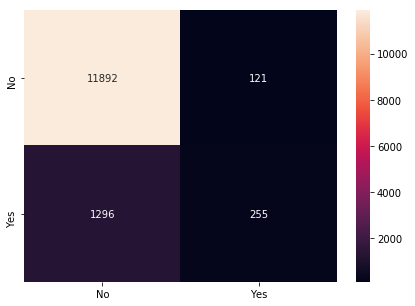

In [47]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble RandomForest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

0.8889708050722501


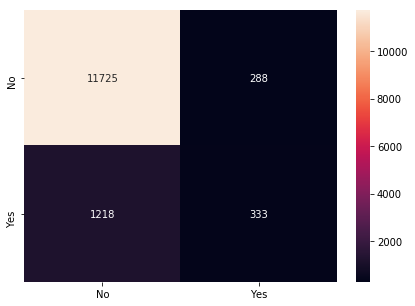

In [49]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Building the GradientBoostingRegressor

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
gbrg = GradientBoostingRegressor(n_estimators = 50,random_state=1)
gbrg = gbrg.fit(X_train, y_train)

In [51]:
y_predict = gbrg.predict(X_test)
print(gbrg.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.1583226712554865


ValueError: Classification metrics can't handle a mix of binary and continuous targets

# Buliding RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfrg = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfrg = rfrg.fit(X_train, y_train)

In [ ]:
y_predict = rfrg.predict(X_test)
print(rfrg.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Build the BaggingRegressor

In [ ]:
from sklearn.ensemble import BaggingRegressor

bgrg = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgrg = bgrg.fit(X_train, y_train)

In [ ]:
y_predict = bgrg.predict(X_test)

print(bgrg.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Compare performances of all the models using multiple evaluation metrics for classification

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
classifier1 = DecisionTreeClassifier()
classifier2 = BaggingClassifier()
classifier3 = AdaBoostClassifier()
classifier4 = GradientBoostingClassifier()
classifier5 = RandomForestClassifier()
probas1_ = classifier1.fit(X_train, y_train).predict_proba(X_test)
probas2_ = classifier2.fit(X_train, y_train).predict_proba(X_test)
probas3_= classifier3.fit(X_train, y_train).predict_proba(X_test)
probas4_= classifier4.fit(X_train, y_train).predict_proba(X_test)
probas5_= classifier5.fit(X_train, y_train).predict_proba(X_test)

In [ ]:
# Compute ROC curve and area the curve for DecisionTreeClassifier
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve for Decision Tree Classifier : %f" % roc_auc1)

In [ ]:
# Compute ROC curve and area the curve for Bagging Classifier
fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve for Bagging Classifier : %f" % roc_auc2)

In [ ]:
# Compute ROC curve and area the curve for AdaBoostingClassifier
fpr3, tpr3, thresholds3 = roc_curve(y_test, probas3_[:, 1])
roc_auc3 = auc(fpr3, tpr3)
print("Area under the ROC curve for AdaBoosting Classifier : %f" % roc_auc3)

In [ ]:
# Compute ROC curve and area the curve for GradientBoostingClassifier
fpr4, tpr4, thresholds4 = roc_curve(y_test, probas4_[:, 1])
roc_auc4 = auc(fpr4, tpr4)
print("Area under the ROC curve for Gardient Boosting Classifier : %f" % roc_auc4)

In [ ]:
# Compute ROC curve and area the curve for RandomForestClassifier
fpr5, tpr5, thresholds5 = roc_curve(y_test, probas5_[:, 1])
roc_auc5 = auc(fpr5, tpr5)
print("Area under the ROC curve for Random Forest Classifier : %f" % roc_auc5)

In [ ]:
# Plot ROC curve
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for Decision Tree Classifier (area = %0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label='ROC curve for Bagging Classifier  (area = %0.2f)' % roc_auc2)
pl.plot(fpr3, tpr3, label='ROC curve for AdaBoosting Classifier (area = %0.2f)' % roc_auc3)
pl.plot(fpr4, tpr4, label='ROC curve for Gradient Boosting Classifier (area = %0.2f)' % roc_auc4)
pl.plot(fpr5, tpr5, label='ROC curve for Random Forest Classifier (area = %0.2f)' % roc_auc5)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC curve')
pl.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
pl.show()

# Observations and inferences on overall analysis, model and evaluation

The classification goal to predict if the client will subscribe (yes/no) a term deposit is best predict by using Adaboosting or Gradient Boosting classification techiques. T
Observations: - Age and Poutcome(outcome of previous campaign) are modt importsnt criteria for the classification.
Model: - he Gradient Boosting Classifier has the best classification prediction with the 77% AUC and Adaboosting closely following with 76% AUC.

# -------------------------------------------------END------------------------------------------------------